In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "LA_AQS_2023.csv"


Pandas package reads the data file

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
0,6,37,1103,68103,1,34.06659,-118.22688,WGS84,Ambient Min Temperature,24 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
2,6,37,1103,62201,1,34.06659,-118.22688,WGS84,Relative Humidity,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
3,6,37,1103,62101,1,34.06659,-118.22688,WGS84,Outdoor Temperature,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
4,6,37,1103,42603,1,34.06659,-118.22688,WGS84,Oxides of nitrogen (NOx),1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [5]:
df['Parameter Name']

0           Ambient Min Temperature
1            Nitrogen dioxide (NO2)
2                 Relative Humidity
3               Outdoor Temperature
4          Oxides of nitrogen (NOx)
                    ...            
22155               Solar radiation
22156    Wind Direction - Resultant
22157        Wind Speed - Resultant
22158             Relative Humidity
22159           Outdoor Temperature
Name: Parameter Name, Length: 22160, dtype: object

In [6]:
df_O3 = df[(df["Parameter Name"]=="Ozone") & (df['Duration Description']=="1 HOUR")]
df_O3.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
20,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
64,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
204,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
228,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
271,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [7]:
df_O3['Date (Local)']

20       2023-01-01
64       2023-01-02
204      2023-01-03
228      2023-01-04
271      2023-01-05
            ...    
21122    2023-09-26
21168    2023-09-27
21218    2023-09-28
21261    2023-09-29
21305    2023-09-30
Name: Date (Local), Length: 273, dtype: object

In [8]:
# Let's make sure 'date' is actually a date in pandas
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])

/var/folders/tj/h7yymnk16p1dd895mpk4pc080000gn/T/ipykernel_10360/3843948999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])


In [9]:
df_O3['Date (Local)']

20      2023-01-01
64      2023-01-02
204     2023-01-03
228     2023-01-04
271     2023-01-05
           ...    
21122   2023-09-26
21168   2023-09-27
21218   2023-09-28
21261   2023-09-29
21305   2023-09-30
Name: Date (Local), Length: 273, dtype: datetime64[ns]

In [10]:
date = df_O3["Date (Local)"]
value = df_O3["Arithmetic Mean"]

<Axes: xlabel='Date (Local)', ylabel='Arithmetic Mean'>

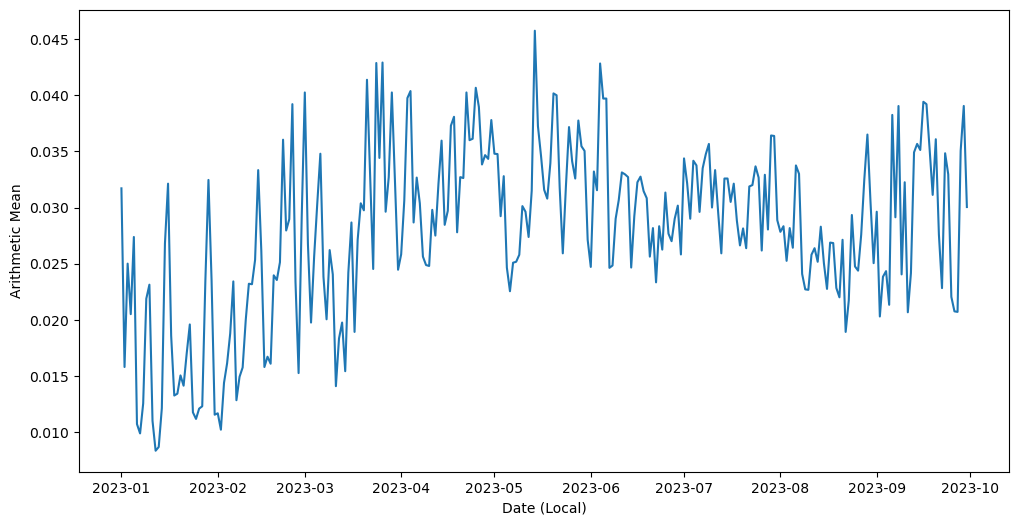

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot( data=df_O3, x=date, y=value)

a. When is O3 highest at this monitor?


b. How many days have O3 concentrations above 35 ppbv?

In [35]:
high_O3 = df_O3['Arithmetic Mean'].max()
date = df_O3.loc[df_O3['Arithmetic Mean'] == high_O3, 'Date (Local)']
print(date)


12292   2023-05-14
Name: Date (Local), dtype: datetime64[ns]


The day with highest O3 concentration is 2023-05-14

In [33]:
days = sum(df_O3['Arithmetic Mean']> 0.035)

In [36]:
print(days)

43


Number days when O3 concentrations was above 35ppbv is 43.